In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import numpy as np

import scipy.stats as stats
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)

# Leitura dos Dados

In [36]:
file_path = 'C:\\Users\\doniz\\Documents\\ChurnAnalysis-Telco\\WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(file_path)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
# Usando errors='coerce' para converter valores não-numéricos em NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Teste de Hipótese

## Teste Chi Quadrado

### Condições e Suposições do Teste de Qui-Quadrado

O teste de qui-quadrado é usado para testar associações entre variáveis categóricas. Por exemplo, pode ajudar a responder perguntas como "Há uma associação entre gênero e preferência por um tipo de produto?"

Para realizar o teste de qui-quadrado e garantir a validade dos resultados, várias condições e suposições devem ser satisfeitas:

1. **Dados Categóricos**
   - Ambas as variáveis analisadas devem ser categóricas (por exemplo, sim/não, categorias de serviço).

2. **Independência das Observações**
   - As observações devem ser independentes, o que significa que a seleção de uma observação não afeta a seleção de outra. Em pesquisas, isso é geralmente assegurado com amostragem aleatória.

3. **Tamanho Adequado da Amostra**
   - O teste de qui-quadrado exige que todas as células na tabela de contingência tenham uma expectativa de pelo menos 5. Se isso não for possível, menos de 20% das células devem ter expectativas menores que 5, e nenhuma célula deve ter uma expectativa menor que 1.

4. **Independência das Categorias**
   - As categorias para cada variável devem ser mutuamente exclusivas e exaustivas, o que significa que cada observação pode ser categorizada de forma única para cada variável.

5. **Número de Categorias**
   - Não há um limite máximo estabelecido para o número de categorias, mas ter muitas categorias pode levar a células com contagens muito baixas, potencialmente violando a condição sobre o tamanho mínimo esperado da amostra.

### Verificações e Ajustes

Se algumas dessas condições não forem cumpridas, pode ser necessário ajustar a análise (por exemplo, combinando categorias) ou escolher um método estatístico diferente (como o Teste Exato de Fisher para tabelas menores).

Essas condições garantem que os resultados do teste de qui-quadrado sejam confiáveis e representem adequadamente a associação entre as variáveis categóricas analisadas.


### Aplicação do Teste Chi Quadrado

**Hipótese nula e a alternativa:**
- *Hipótese Nula (H0):* Não há associação entre o tipo de serviço de internet e a taxa de churn dos clientes.
- *Hipótese Alternativa (H1):* Existe uma associação entre o tipo de serviço de internet e a taxa de churn dos clientes.

Para o caso analisado temos satisfeitas:

1\. **Dados Categóricos**
   - Tanto `InternetService` quanto `Churn` são variáveis categóricas.

2\. **Independência das Observações**
   - Em um conjunto de dados como o da Telco, essa verificação é mais sobre entender como os dados foram coletados. Não podemos verificar a coleta de dados diretamente e assumiremos como verdadeira.

4\. **Independência das Categorias**
   - Isso é garantido pela natureza do projeto de dados.

5\. **Número de Categorias:**
   - É necessário que haja um número gerenciável de categorias nas variáveis para que o teste de qui-quadrado possa ser realizado adequadamente.

In [12]:
# 4 Número de categorias
num_categories_internet_service = df['InternetService'].nunique()
num_categories_churn = df['Churn'].nunique()

print(f"Número de categorias em InternetService: {num_categories_internet_service}")
print(f"Número de categorias em Churn: {num_categories_churn}")

Número de categorias em InternetService: 3
Número de categorias em Churn: 2


In [5]:
# Preparando a tabela de contingência para o teste do qui-quadrado
contingency_table = pd.crosstab(df['InternetService'], df['Churn'])

In [6]:
contingency_table.head()

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


3\. **Tamanho Adequado da Amostra:**

In [11]:
# Verificar se todas as células têm pelo menos 5 como valor esperado
cell_frequencies = (contingency_table.values >= 5).all()
print(f"Todas as células têm frequências esperadas >= 5? {cell_frequencies}")

Todas as células têm frequências esperadas >= 5? True


Aplicação do teste

In [7]:
# Aplicação do teste de Qui-Quadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table.loc[['DSL', 'Fiber optic']])

In [10]:
# Impressão dos resultados do teste
print(f'Chi-squared: {round(chi2,3)}')
print(f'p-value: {round(p_value,3)}')
print(f'Degrees of freedom: {round(dof,3)}')
print('Expected frequencies:')
print(expected)

Chi-squared: 328.263
p-value: 0.0
Degrees of freedom: 1
Expected frequencies:
[[1650.42251223  770.57748777]
 [2110.57748777  985.42251223]]


Resultado

In [14]:
# Conclusão baseada no p-value
if p_value < 0.05:
    print("Rejeitamos a hipótese nula, indicando que \033[1;31m há uma diferença significativa no churn entre DSL e Fiber optic \033[0m .")
else:
    print("Não rejeitamos a hipótese nula, indicando que \033[1;31m não há diferença significativa no churn entre DSL e Fiber optic \033[0m .")

Rejeitamos a hipótese nula, indicando que  há uma diferença significativa no churn entre DSL e Fiber optic  .


**Conclusão:**

- Com base nesses resultados, podemos concluir que existe uma diferença significativa nas taxas de churn entre os clientes que usam DSL e os que usam fibra óptica. Especificamente, dado o contexto e a análise, parece que os clientes com fibra óptica têm uma maior tendência a deixar a empresa comparado aos clientes com DSL, contrariando a hipótese nula de que o churn para clientes com DSL seria igual ao dos clientes com fibra óptica.

## Teste T de Student

### Condições e Suposições do Teste de Qui-Quadrado

In [51]:
df2 = df[df['TotalCharges'].notna()].copy()

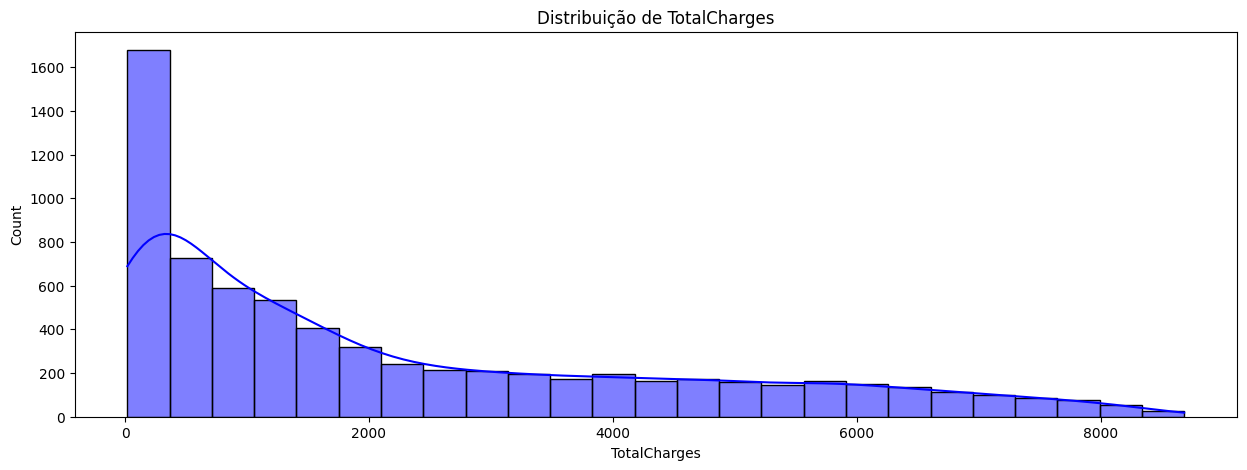

In [43]:
plt.figure(figsize=(15, 5))
sns.histplot(df2['TotalCharges'], kde=True, color='blue')
plt.title('Distribuição de TotalCharges')
plt.show()

In [94]:
df3 = pd.DataFrame()
df3 = df2[['TotalCharges','Churn']].sample(n=3000, random_state=123)
df3['log_TotalCharges'] = np.log(df2[['TotalCharges']])

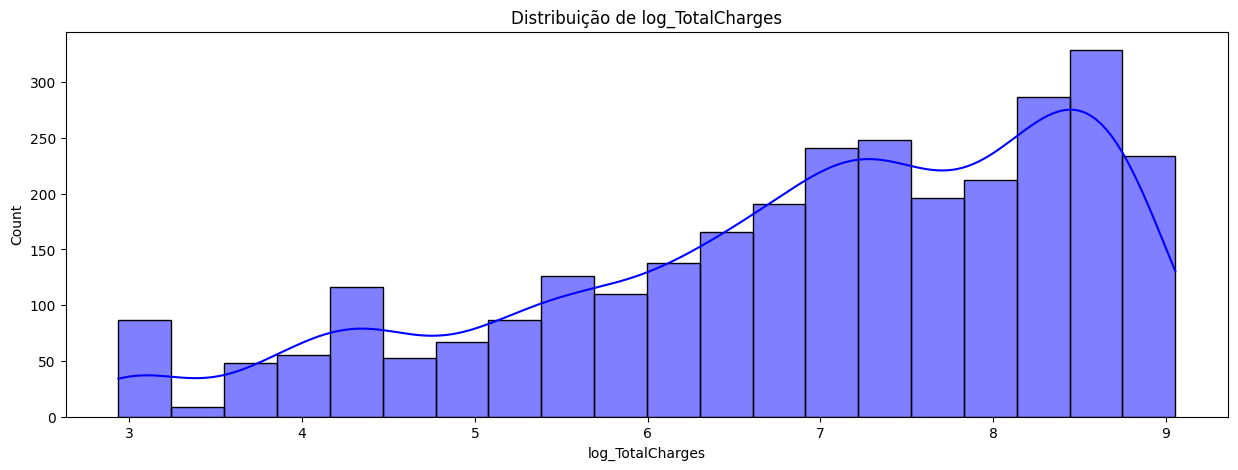

In [95]:
plt.figure(figsize=(15, 5))
sns.histplot(df3['log_TotalCharges'], kde=True, color='blue')
plt.title('Distribuição de log_TotalCharges')
plt.show()

In [101]:
# Separação dos dados em grupos de churn e não churn
charges_with_churn = df3[df3['Churn'] == 'Yes']['log_TotalCharges']
charges_without_churn = df3[df3['Churn'] == 'No']['log_TotalCharges']

In [102]:
# Verificação de normalidade para ambos os grupos
print("Teste de normalidade para clientes com churn:", stats.shapiro(charges_with_churn))
print("Teste de normalidade para clientes sem churn:", stats.shapiro(charges_without_churn))

Teste de normalidade para clientes com churn: ShapiroResult(statistic=0.9556048774057391, pvalue=1.55276289958214e-15)
Teste de normalidade para clientes sem churn: ShapiroResult(statistic=0.9149437220745927, pvalue=5.1133682138862747e-33)


Os resultados dos testes de Shapiro-Wilk indicam que a distribuição da variável TotalCharges, mesmo transformada, para ambos os grupos (com churn e sem churn) é significativamente não-normal. Isso é confirmado pelos valores de p-value extremamente baixos. Mas ainda assim vamos seguir com a avaliação do teste de hipótese T de Student.

In [103]:
# Verificação de homogeneidade de variâncias, ou seja, avaliar se há uma significativa diferença entre as variâncias das duas amostras
print("Teste de Levene para homogeneidade de variâncias:", stats.levene(charges_with_churn, charges_without_churn))

Teste de Levene para homogeneidade de variâncias: LeveneResult(statistic=47.400592083730274, pvalue=7.019635135638338e-12)


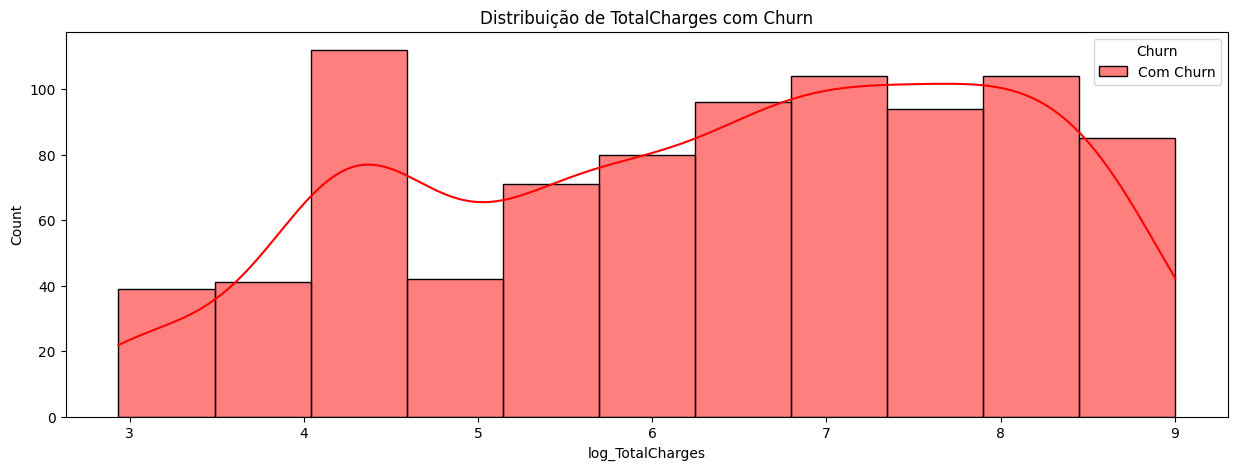

In [104]:
# Visualização das distribuições
plt.figure(figsize=(15, 5))
sns.histplot(charges_with_churn, color="red", kde=True, label='Com Churn')
plt.legend(title='Churn')
plt.title('Distribuição de TotalCharges com Churn')
plt.show()

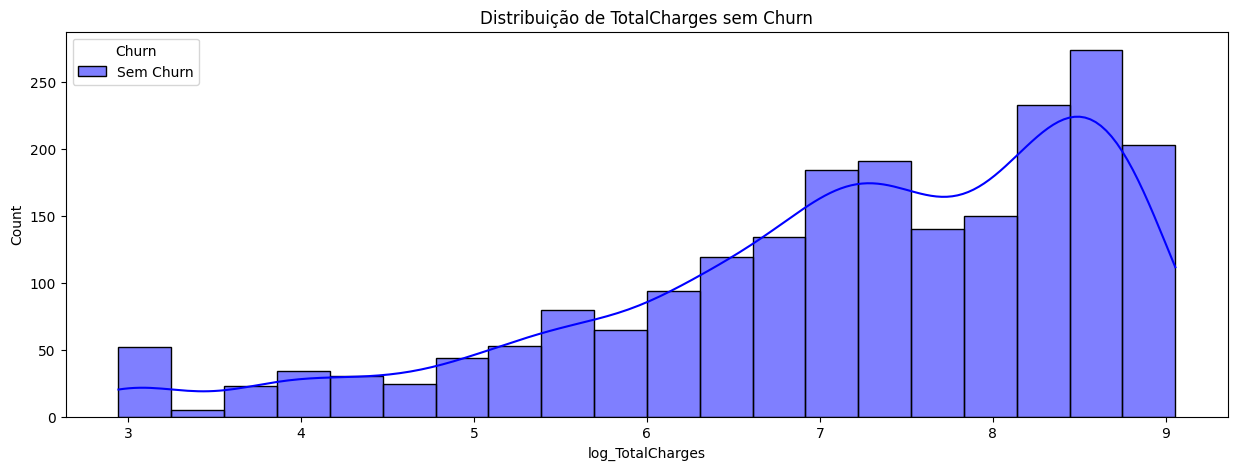

In [105]:
# Visualização das distribuições
plt.figure(figsize=(15, 5))
sns.histplot(charges_without_churn, color="blue", kde=True, label='Sem Churn')
plt.legend(title='Churn')
plt.title('Distribuição de TotalCharges sem Churn')
plt.show()

In [106]:
# Realizar o teste T
t_stat, p_value = stats.ttest_ind(charges_with_churn, charges_without_churn, equal_var=True)

In [108]:
print(f"T-Statistic: {t_stat}, P-value: {round(p_value,5)}")

T-Statistic: -13.633914504481416, P-value: 0.0


In [110]:
if p_value < 0.05:
    print("Rejeitamos a hipótese nula, indicando que há uma diferença significativa nas taxas entre clientes com e sem churn.")
else:
    print("Não rejeitamos a hipótese nula, indicando que não há diferença significativa nas taxas entre clientes com e sem churn.")

Rejeitamos a hipótese nula, indicando que há uma diferença significativa nas taxas entre clientes com e sem churn.
